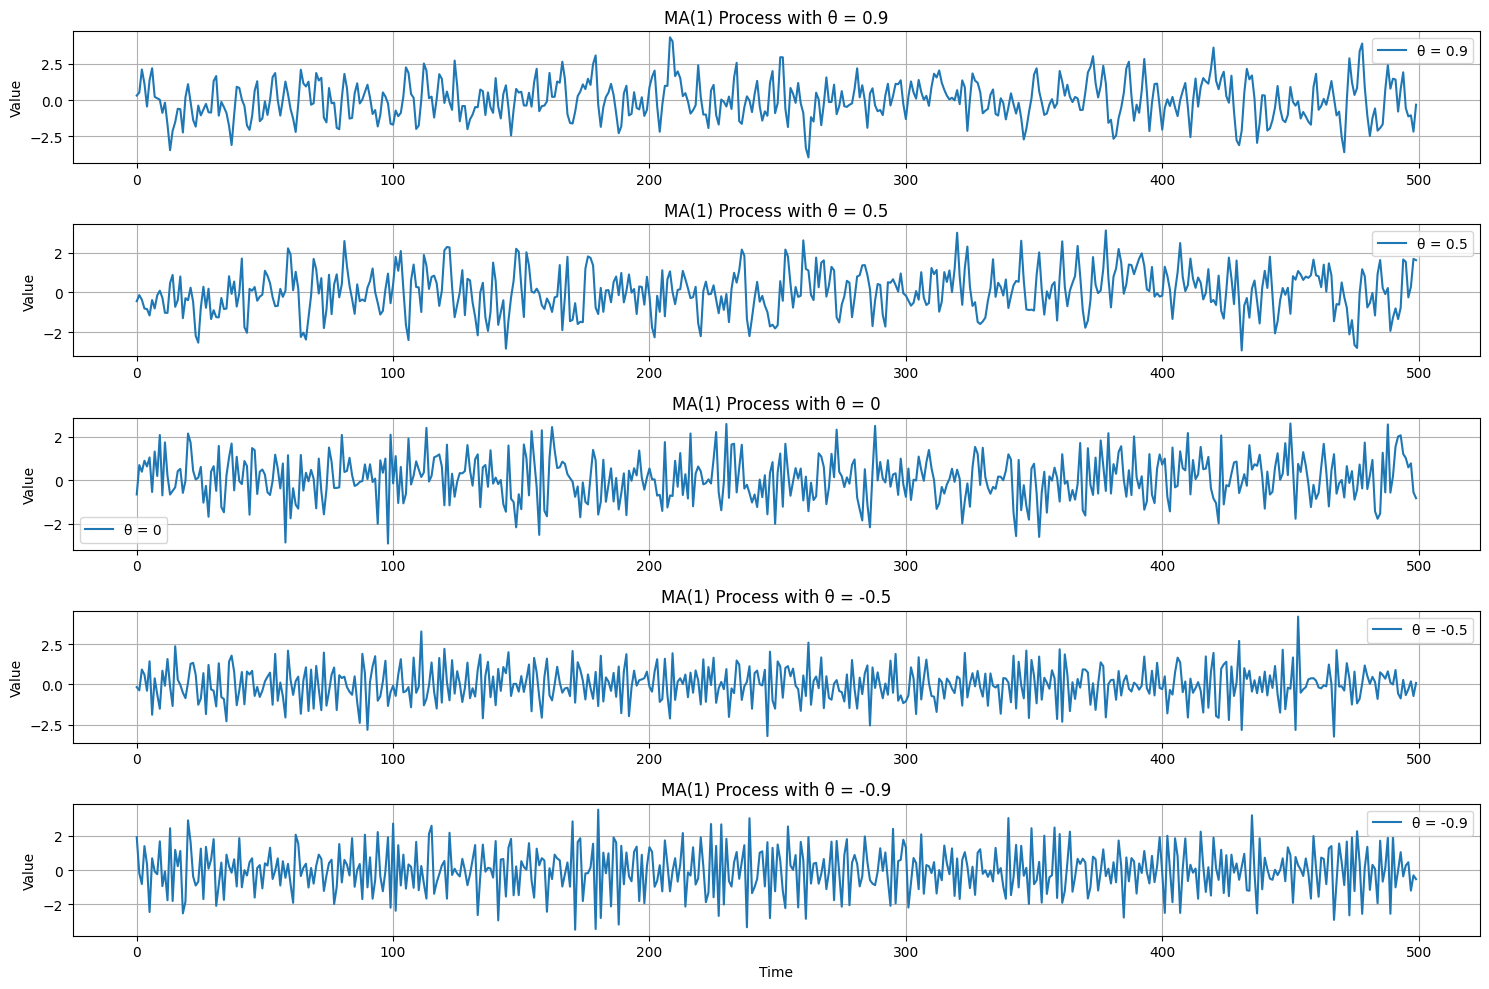

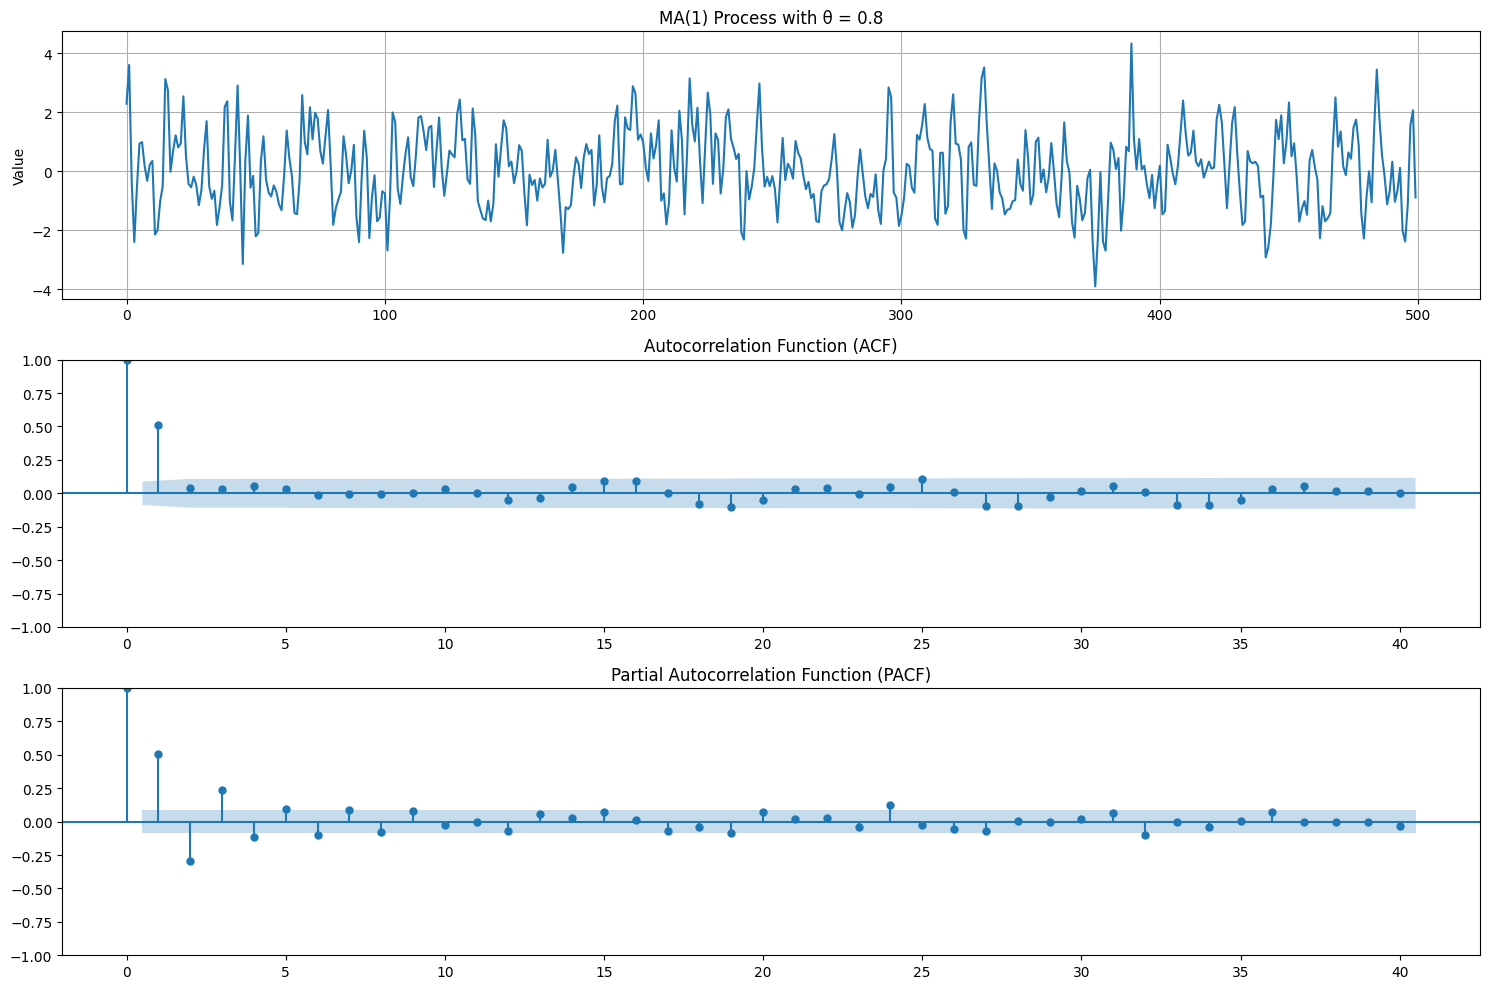

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1000x600 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

def generate_ma1(theta, n_points=1000, sigma=1.0):
    """
    Generate an MA(1) process: X_t = ε_t + θ * ε_{t-1}
    
    Parameters:
    -----------
    theta : float
        The MA coefficient
    n_points : int
        Number of points to generate
    sigma : float
        Standard deviation of the noise term
    
    Returns:
    --------
    numpy.array
        The generated MA(1) process
    """
    # Generate random noise (we need an extra point for the initial condition)
    epsilon = np.random.normal(0, sigma, n_points + 1)
    
    # Initialize array for MA process
    x = np.zeros(n_points)
    
    # Generate MA(1) process
    for t in range(n_points):
        x[t] = epsilon[t+1] + theta * epsilon[t]
    
    return x

def plot_shock_response(theta, n_periods=10):
    """
    Visualize how a single shock propagates through an MA(1) process
    """
    response = np.zeros(n_periods)
    response[0] = 1  # Initial shock
    response[1] = theta  # Effect of shock in next period
    
    plt.figure(figsize=(10, 6))
    plt.stem(range(n_periods), response, use_line_collection=True)
    plt.title(f'Response to Unit Shock in MA(1) Process (θ = {theta})')
    plt.xlabel('Time')
    plt.ylabel('Effect of Shock')
    plt.grid(True)
    plt.show()

# Generate MA(1) processes with different theta values
thetas = [0.9, 0.5, 0, -0.5, -0.9]
n_points = 500

# Create figure for time series plots
plt.figure(figsize=(15, 10))

for i, theta in enumerate(thetas):
    # Generate MA(1) process
    ma_process = generate_ma1(theta, n_points)
    
    # Plot time series
    plt.subplot(len(thetas), 1, i+1)
    plt.plot(ma_process, label=f'θ = {theta}')
    plt.title(f'MA(1) Process with θ = {theta}')
    plt.ylabel('Value')
    if i == len(thetas)-1:
        plt.xlabel('Time')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze one MA(1) process in detail
theta = 0.8
ma_process = generate_ma1(theta, n_points)

# Create figure for detailed analysis
fig = plt.figure(figsize=(15, 10))

# Plot time series
plt.subplot(311)
plt.plot(ma_process)
plt.title(f'MA(1) Process with θ = {theta}')
plt.ylabel('Value')
plt.grid(True)

# Plot ACF
plt.subplot(312)
plot_acf(ma_process, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(313)
plot_pacf(ma_process, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Show how shocks propagate through the system
for theta in [0.8, -0.5]:
    plot_shock_response(theta)

# Compare theoretical vs. empirical autocorrelation
def theoretical_ma1_acf(theta, lags=10):
    """Calculate theoretical ACF for MA(1) process"""
    acf = np.zeros(lags + 1)
    acf[0] = 1  # Correlation at lag 0 is always 1
    acf[1] = theta / (1 + theta**2)  # Theoretical autocorrelation at lag 1
    return acf

# Plot theoretical vs empirical ACF
plt.figure(figsize=(12, 6))
theta = 0.8
ma_process = generate_ma1(theta, 1000)

# Calculate empirical ACF
empirical_acf = np.array([np.corrcoef(ma_process[:-k], ma_process[k:])[0,1] 
                         for k in range(1, 6)])
theoretical_acf = theoretical_ma1_acf(theta, 5)[1:]

plt.plot(range(1, 6), empirical_acf, 'bo-', label='Empirical ACF')
plt.plot(range(1, 6), theoretical_acf, 'ro--', label='Theoretical ACF')
plt.title(f'Theoretical vs Empirical ACF for MA(1) with θ = {theta}')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.legend()
plt.show()